# Lab #3: Asking a statistical question
#### Aidan Berres
#### Physics 434
#### 10/25/20

In [67]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import astropy.units as u

## Problem 1
In this problem we are going to be using a test to find false values (errors/glitches) in our distribution. The test will consist of a range threshold that fits to the original distribution. These thresholds will most likely be the locations of rare signals, such as the location of a 5-sigma signal.
## 1. A)
1. The plot of the Temperature readings, with the added errors, as we can see, most of the errors are shown since they are far from the distribution, but some are either very close or inside the distribution.

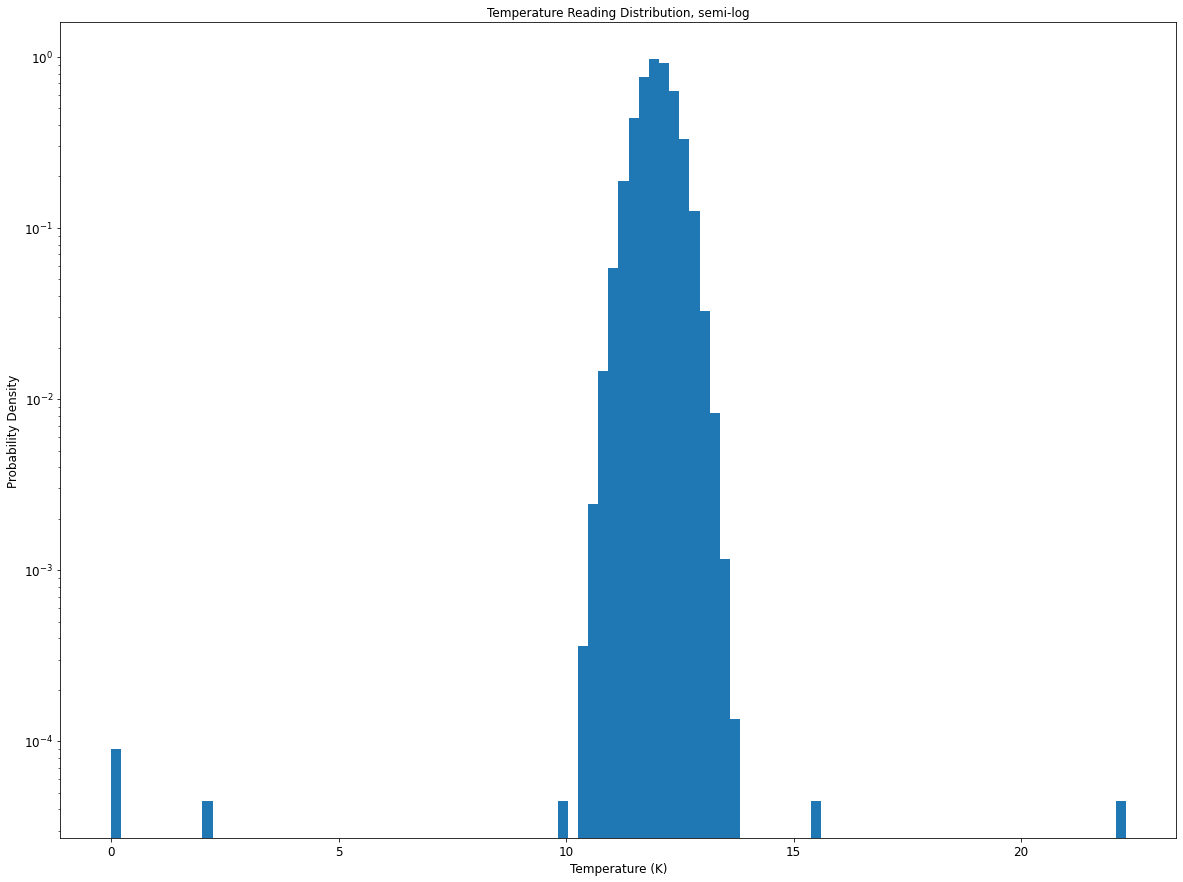

In [132]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1,figsize=(20,15))
plt.tick_params(labelsize = 12)
plt.yscale('log')
ax.set_title('Temperature Reading Distribution, semi-log',fontsize=12)
ax.set_xlabel('Temperature (K)',fontsize=12)
ax.set_ylabel('Probability Density',fontsize=12)
ax.hist(d,100,density=True);


2. My statistical question is, What is the chance that my Test with a certain sigma threshold will identify True Good values as good data and True Bad values as bad data? I chose this question since the test uses statistical parameters in order to determine good and bad data, the amount of false positives and negatives will be shown in the truth table below.

3. The math involved is that I find the location of a 5-sigma event on both of the ends of the distribution and set those as my search limits. Thus my test will say that values within this 5-sigma threshold are good and values outside are bad. I generate the 5-sigma probability from a Standard Normal Distribution and then converted to a location value using a ppf with the parameters of the distribution.

In [138]:
def test(sigma):
    bad=0
    good=0
    fp=0
    fn=0
    ba=[]
    bv=[10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
    siggy5=1-stats.norm.cdf(sigma)
    mi=stats.norm.ppf(siggy5,loc=12,scale=0.4)
    ma=stats.norm.ppf(1-siggy5,loc=12,scale=0.4)
    for i in range(len(d)):
        if d[i]<mi or d[i]>ma:
            bad+=1
            ba.append(d[i])
        else:
            good+=1
    for j in range(len(bv)):
        if bv[j]<mi or bv[j]>ma:
            fp+=1
        else:
            fn+=1
    gt=good-fn
    tb=100000-gt
    print("Good True Values = ",gt)
    print("Bad True Values  = ",tb)
    print("Good Bad Values  = ",fn)
    print('Bad Bad Values   = ',fp)

In [139]:
test(5)

Good True Values =  100000
Bad True Values  =  0
Good Bad Values  =  2
Bad Bad Values   =  6


4. Thus the truth table for a threshold of 5-sigma for the distribution in the dataset,

|              | True T | Bad T |
|-------------:|-------:|------:|
| My Test Good |     100000 |     2 |
|  My Test Bad |      0 |    6 |

We can see that my test found all 100000 true values and said that 2 bad values are also good. It also identified 6 bad values as bad, and identified no good values as bad.

## 1. B)
We can see that when we use a 4-sigma threshold, that we have identified more false negatives in the True T / My Test Bad, than before. It has identified more bad values than originally added thus, we have false negatives. When we decrease the search parameters, we find that more True values are considered Bad by my test. If we increase the sigma value, we find that the search does become more wider which may help take away some of the good values that were deemed bad, but that may let some bad values that sit at the end of the distribution like the value 10.3, which could be picked up easily by a larger search range.

In [140]:
test(4)

Good True Values =  99996
Bad True Values  =  4
Good Bad Values  =  1
Bad Bad Values   =  7


|              | True T | Bad T |
|-------------:|-------:|------:|
| My Test Good | 99995  |     1 |
|  My Test Bad |      5 |     7 |


## 1. C) 
There are some mistakes of commission in this test. The data points that exist inside the original distribution like the value, 12.7, we see that it may be hard to identify this value as bad since it is so close to the mean. Furthermore, the distribution creation is done randomly each time it is called thus the values close to the mean are not truly uniform and vary by some number, most likely more than one datapoint. This means that due to the distributions randomness we will most likely never find this datapoint with a test like mine.

---
## Problem 2
In this portion, we will be finding the threshold of a significant detection, given the background distribution. The background distribution is a multi-variate Normal Distribution, which is made of two Normal distributions, both with a mean of zero and a standard deviation of 1 (one for the x-values, and one for the y-values), added toghether to create a sort of heat map of counts.

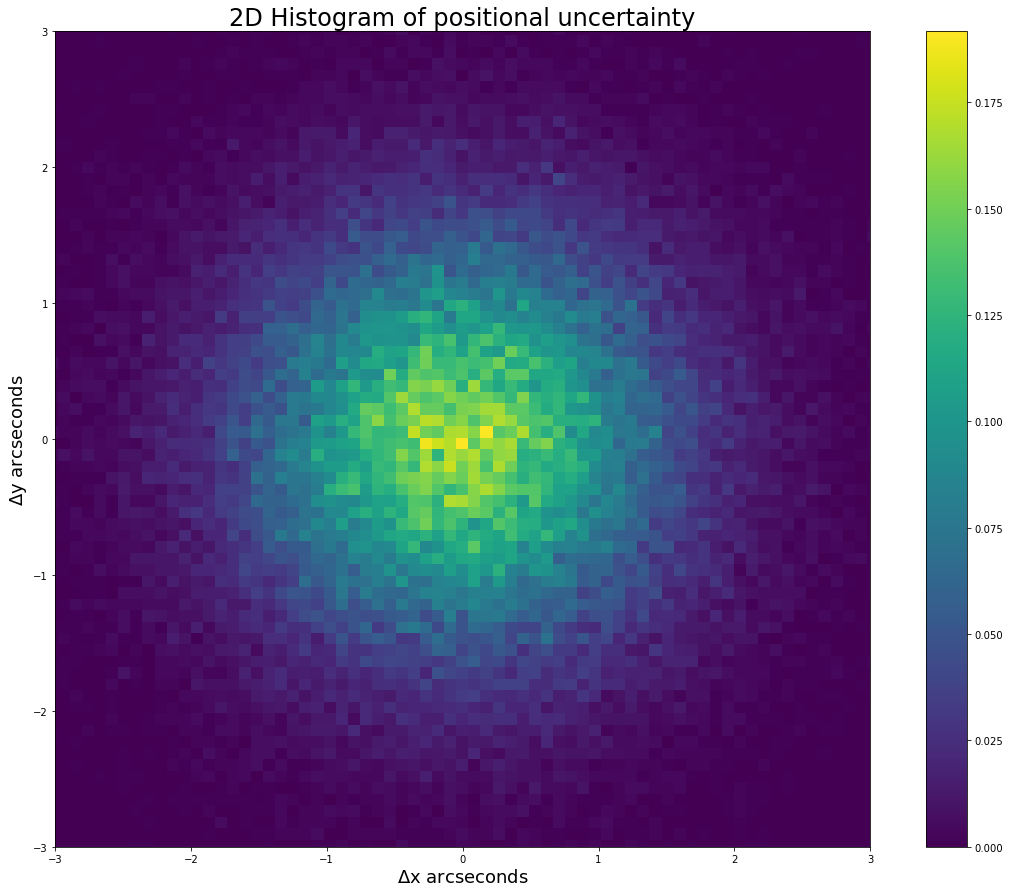

In [36]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1,figsize=(20,15))
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
ax.set_xlim([-3 , 3])
ax.set_ylim([-3 , 3])
ax.set_title("2D Histogram of positional uncertainty", fontsize = 24)
ax.set_ylabel("$\Delta$y arcseconds", fontsize = 18)
ax.set_xlabel("$\Delta$x arcseconds", fontsize = 18)
fig.colorbar(h[3], ax=ax);

1. My question is, what is the distance an object must travel to be considered a significant discovery given this background distribution?

2. We can describe the probability distribution in terms of the radius away from the center mean value. With the two distributions we can say each normal random vector is $X$ and $Y$ in which we can write the distance from a point away from the origin as $\sqrt{X^2 + Y^2}$ which is the norm of the random normal distribution vector. We know that this norm is related to the pdf of a chi distribution of 2 degrees of freedom $ \chi _{2}$ since it is a two dimensional vector. This specific chi distribution relates to a Rayleigh distribution of $\sigma=1$, thus we can use a Rayleigh ppf to find the distance travelled for a 5-sigma event.

3. *See Below*

In [131]:
siggy5= 1-stats.norm.cdf(5)
stats.rayleigh.ppf(1-siggy5)

5.489079776034238

As we take the ppf of a Rayleigh distribution, using a 5-sigma probability, we see the location is about 5.5, which is the distance an asteroid must travel in order for it to be a significant detection of 5-sigma.

## Problem 3
In this problem we are trying to find if our data is signal-free. Basically, we are finding if our data is too common to be considered being blocked by something, since we would see a significant decrease in detections.

1. My statistical question is, What is the probability of our findings being a shadow cast by the moon and not background signal data?

2. This problem can be represented as a Poisson distribution since we have a rate of detections, a time frame of observations, and a discrete number of observations. Thus, we can find our rate of gamma rays detected for a 15 day observation. If we look at the 15 days we observed, since the cosmic ray rate for this region is 1 ray/min we must multiply to get it to hours and then multiply it by the 8 hours of observations, and then multiply it by the 15 days we observed to get the cosmic ray rate for 15 days of observations. This comes out to 7200 observations, we can set this as the rate for our Poisson distribution. Then, we can find the probability using the cdf function to find if the measurement of 6800 rays over this observation period is significant.

In [136]:
avggamma=60*8*15
avggamma

7200

In [137]:
rate=7200
pr=stats.poisson.cdf(6800,mu=avggamma)
stats.norm.ppf(pr)

-4.750747965777188

We find that the observation of 6800 gamma rays is too common for this to be signal free background since it is very close to the mean, it is taking up a lot of area on the Normal distribution, which means that this is too probable and that this is not data that is being obscured by the Moon.